In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [94]:
datos=pd.read_csv('./datos/salarios_1.csv')
datos.head(10)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000
5,8.0,37000
6,4.0,26300
7,6.0,35201
8,2.0,18302
9,10.0,42000


In [95]:
x = datos.iloc[:, :-2].values
y=datos.iloc[:, 1].values

In [96]:
#creamos un array que contendra las inciiales de los paises
paises = ['EC', 'PE', 'ES', 'USA', 'KR', 'EC', 'PE', 'ES', 'USA', 'KR']

In [97]:
#Creamos una columna que genere los numeros enteros a los paises para agregar ambas colunmas a los datos
nueva_columna = [paises[np.random.randint(0, len(paises))]for i in range(30)] 

In [99]:
datos['Pais'] = nueva_columna
datos['NormPaises'] = pd.factorize(datos['Pais'])[0]
x=datos[['Aexperiencia', 'NormPaises']]
y=datos['Salario']
datos

,Aexperiencia,Salario,Pais,NormPaises
0,10.0,42500,ES,0
1,8.0,36302,ES,0
2,5.4,35000,EC,1
3,2.5,18103,EC,1
4,1.0,15000,PE,2
5,8.0,37000,EC,1
6,4.0,26300,EC,1
7,6.0,35201,ES,0
8,2.0,18302,USA,3
9,10.0,42000,USA,3


In [101]:
#Parametrizamos los datos y los entrenamos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
regresion = LinearRegression()
regresion.fit(x_train, y_train)


LinearRegression()

Text(0.5, 0, 'Salarios')

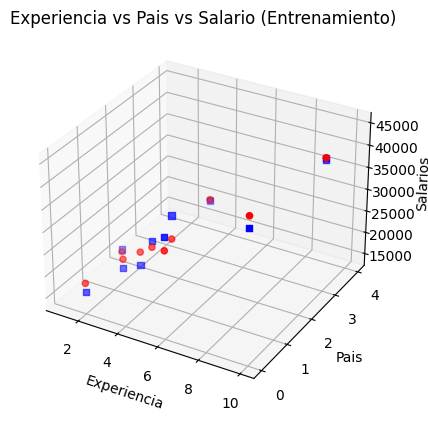

In [112]:
#Mostramos graficamente como prediccion de entrenamiento
fig = plt.figure(dpi = 100)
viz_test = fig.add_subplot(111, projection = "3d")
viz_test.set_title('Experiencia vs Pais vs Salario (Entrenamiento)')
viz_test.scatter(x_train['Aexperiencia'], x_train['NormPaises'], y_train, c='b', marker='s')
viz_test.scatter(x_train['Aexperiencia'], x_train['NormPaises'],regresion.predict(x_train), c='r', marker='o')
viz_test.set_xlabel('Experiencia')
viz_test.set_ylabel('Pais')
viz_test.set_zlabel('Salarios')


Text(0.5, 0, 'Salarios')

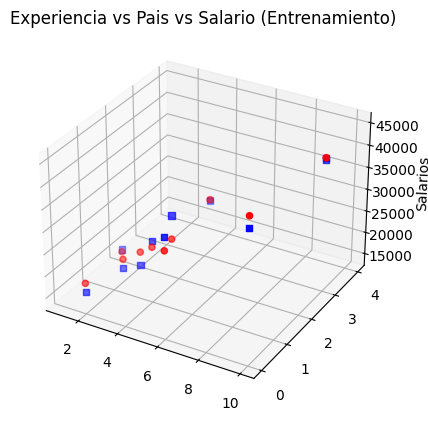

In [111]:
#Mostramos graficamente como prediccion de entrenamiento
fig = plt.figure(dpi = 100)
viz_test = fig.add_subplot(111, projection = "3d")
viz_test.set_title('Experiencia vs Pais vs Salario (Entrenamiento)')
viz_test.scatter(x_train['Aexperiencia'], x_train['NormPaises'], y_train, c='b', marker='s')
viz_test.scatter(x_train['Aexperiencia'], x_train['NormPaises'],regresion.predict(x_train), c='r', marker='o')
viz_test.set_xlabel('Experiencia')
viz_test.set_zlabel('Pais')
viz_test.set_zlabel('Salarios')

In [113]:
regresion.score(x_test, y_test)

0.9257153064451636